In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [33]:
battles = pd.read_csv('dataset/battles.csv')

## Preview Dataset

In [34]:
pd.set_option('display.max_columns', None)
battles

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


## Informasi Dataset

terdiri dari :
**28 baris** dan **25 kolom** \
tipe data :
_object_, _int64_, dan _float64_

In [35]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

## Komposisi Tipe Data

In [36]:
numberical = [x for x in battles.columns if battles[x].dtype!='O']
categorical = [x for x in battles.columns if battles[x].dtype=='O']
print(f"Categorical: {len(categorical)} \n Numberical: {len(numberical)}")

Categorical: 16 
 Numberical: 9


## Persentase Missing Values

In [37]:
missing_values_total = battles.isnull().sum().sort_values(ascending=False)
missing_values_pct = (battles.isnull().sum()/len(battles)*100).sort_values(ascending=False)

missing_values = pd.concat([missing_values_total, missing_values_pct,battles.dtypes],
                           keys=['Total','Percentage','Dtype'],
                           axis=1)
missing_values.head(15)

,Total,Percentage,Dtype
defender_4,38,100.000000,float64
defender_3,38,100.000000,float64
defender_2,36,94.736842,object
attacker_4,36,94.736842,object
attacker_3,35,92.105263,object
note,33,86.842105,object
attacker_2,28,73.684211,object
defender_size,19,50.000000,float64
attacker_size,14,36.842105,float64
defender_commander,10,26.315789,object


## Pemeriksaan Dataset

### Temuan 1
pada baris 37 terdapat _battle_type_ dengan nilai NaN yang bisa diisi sesuai dengan battle _name_ yaitu **siege**

In [38]:
battles[['name','battle_type']].loc[battles['battle_type'].isnull()]

,name,battle_type
37,Siege of Winterfell,NaN


### Temuan 2
pada baris 37 terdapat *attacker_outcome* dengan nilai NaN. 

dikutip dari [wiki March on Winterfell](https://awoiaf.westeros.org/index.php/March_on_Winterfell) (*link Siege_of_Winterfell di-alihkan ke March_on_Winterfell*),\
pada Aftermath, Roose Bolton memulangkan pasukan dan Stannis Baratheon tetap tinggal disana bersama tuan rumah untuk selanjutnya bersiap perang melawan Bolton.

dari kutipan Aftermath diatas,bisa disimpulkan *attacker_outcome* dapat di-isi dengan *win* 

In [39]:
battles[['name','attacker_outcome']].loc[battles['attacker_outcome'].isnull()]

,name,attacker_outcome
37,Siege of Winterfell,NaN


### Temuan 3
dikutip dari [notebook dianyuurl](https://www.kaggle.com/dianyuurl/game-of-thrones-battles-analysis), pada [wiki Game of Thrones](https://gameofthrones.fandom.com/wiki/Battle_of_Castle_Black) _attacker_king_ seharusnya Mance Rayder dan _defender_king_ seharusnya Stannis Baratheon

In [40]:
battles[['attacker_king','defender_king','attacker_size','defender_size']].loc[27]

attacker_king    Stannis Baratheon
defender_king         Mance Rayder
attacker_size             100000.0
defender_size               1240.0
Name: 27, dtype: object

### Temuan 4
pada variabel *attacker_1* s/d *attacker_4* dan *defender_1* s/d defender_4** memiliki banyak nilai **NaN**, maka dari itu:
- bisa diekstraksi menjadi fitur baru berupa jumlah attacker house dan defender house
- setelah itu variabel dengan jumlah NaN >60% bisa di-drop

In [41]:
battles[['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']].head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


### Temuan 5
pada *attacker_commander* dan *defender_commander* berisi nama commander yang dipisahkan oleh koma :
- bisa diekstraksi menjadi fitur baru berupa jumlah commander 
- setelah itu bisa dihapus pada saat training model

In [42]:
battles[['attacker_commander','defender_commander']].head()

,attacker_commander,defender_commander
0,Jaime Lannister,"Clement Piper, Vance"
1,Gregor Clegane,Beric Dondarrion
2,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood"
3,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist..."
4,"Robb Stark, Brynden Tully",Jaime Lannister


### Temuan 6
Imbalanced Data, diperlukan teknik - teknik khusus pada saat membangun model, seperti :
- Menggunakan metrik evaluasi yang sesuai
- Melakukan resampling data
- Menggunakan cross-validation

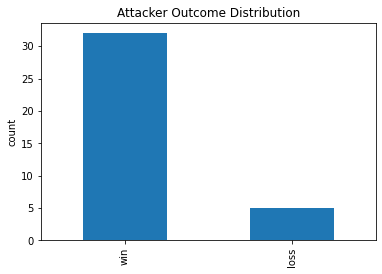

win     32
loss     5
Name: attacker_outcome, dtype: int64

In [44]:
battles['attacker_outcome'].value_counts().plot(kind='bar')
plt.title("Attacker Outcome Distribution") 
plt.ylabel("count") 
plt.show()

battles['attacker_outcome'].value_counts()